## Gauss-like distributions

### Normal distribution

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class NormalDistribution:
    
    # Params
    μ = 0
    σ = 1

    # Constructor
    def __init__(self, μ, σ):
        self.μ = μ
        self.σ = σ

    # Sample from distibution
    def sample(self, size):
        return np.random.normal(self.μ, self.σ ** 2, size)
    
    # PDF - Probability density function
    def pdf(self, axis):
        return (1 / self.σ * np.sqrt(2 * np.pi)) * np.exp( -(1/2) * (((axis - self.μ) / self.σ) ** 2) )
    
    # CDF - Cumultative Density Function
    def cdf(self, axis):
        return np.cumsum(self.pdf(axis))

    # Array of zeros with size param
    def zeros(self, size):
        return np.zeros(size)

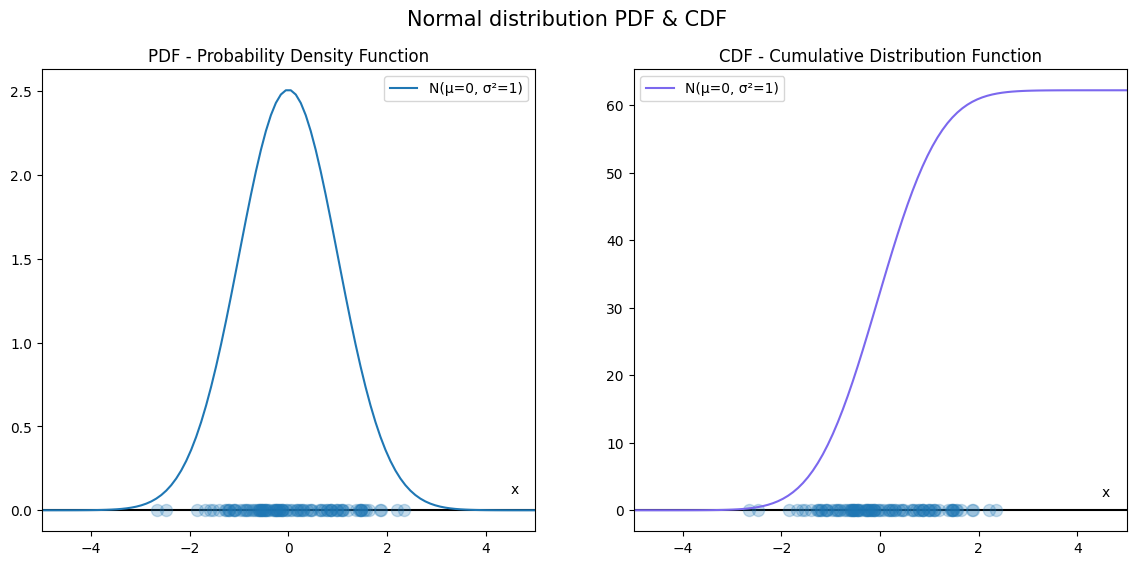

In [34]:
# Normal distribution
size = 100
norm = NormalDistribution(0,1)
data = norm.sample(size)
zeros = norm.zeros(size)
x = np.linspace(-5,5,size)

# Plot
fig, ax = plt.subplots(1,2,figsize=(14,6))
fig.suptitle('Normal distribution PDF & CDF', size=15)

ax[0].scatter(data[:], zeros, alpha=0.25, zorder=2, s=75)
ax[0].plot(x, zeros, c='black', zorder=1)
ax[0].plot(x, norm.pdf(x), label='N(μ={}, σ²={})'.format(norm.μ, norm.σ ** 2))
ax[0].annotate('x', (4.5,0.1))
ax[0].set_title('PDF - Probability Density Function')
ax[0].set_xlim(-5,5)
ax[0].legend()

ax[1].scatter(data[:], zeros, alpha=0.25, zorder=2, s=75)
ax[1].plot(x, zeros, c='black', zorder=1)
ax[1].plot(x, norm.cdf(x), label='N(μ={}, σ²={})'.format(norm.μ, norm.σ ** 2), c='mediumslateblue')
ax[1].annotate('x', (4.5,2))
ax[1].set_title('CDF - Cumulative Distribution Function')
ax[1].set_xlim(-5,5)
ax[1].legend()

### Laplace distribution

In [9]:
import numpy as np
import matplotlib.pyplot as plt

class LaplaceDistribution:
    
    # Params
    μ = 0
    b = 1

    # Constructor
    def __init__(self, μ, b):
        self.μ = μ
        self.b = b

    # Sample from distibution
    def sample(self, size):
        return np.random.laplace(self.μ, self.b, size)
    
    # PDF - Probability density function
    def pdf(self, axis):
        return 1 / (2 * self.b) * np.exp( -np.abs(((axis - self.μ) / self.b)))
    
    # CDF - Cumultative Density Function
    def cdf(self, axis):
        return np.cumsum(self.pdf(axis))

    # Array of zeros with size param
    def zeros(self, size):
        return np.zeros(size)

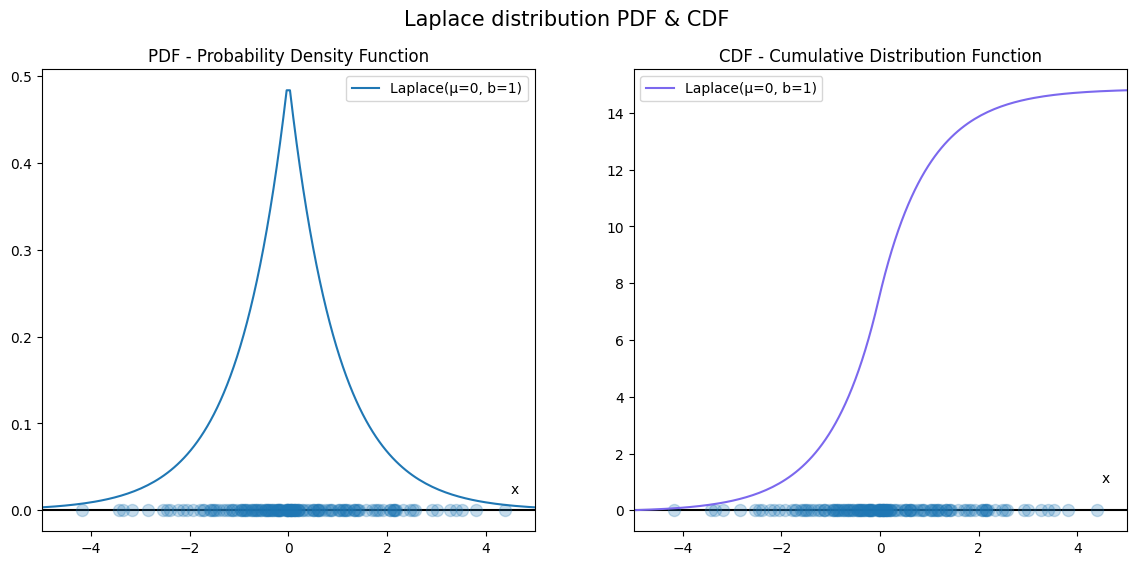

In [31]:
# Laplace distribution
size = 150
lap = LaplaceDistribution(0, 1)
data = lap.sample(size)
zeros = lap.zeros(size)
x = np.linspace(-5,5,size)

# Plot
fig, ax = plt.subplots(1,2,figsize=(14,6))
fig.suptitle('Laplace distribution PDF & CDF', size=15)

ax[0].scatter(data[:], zeros, alpha=0.25, zorder=2, s=75)
ax[0].plot(x, zeros, c='black', zorder=1)
ax[0].plot(x, lap.pdf(x), label='Laplace(μ={}, b={})'.format(lap.μ, lap.b))
ax[0].annotate('x', (4.5,0.02))
ax[0].set_title('PDF - Probability Density Function')
ax[0].set_xlim(-5,5)
ax[0].legend()

ax[1].scatter(data[:], zeros, alpha=0.25, zorder=2, s=75)
ax[1].plot(x, zeros, c='black', zorder=1)
ax[1].plot(x, lap.cdf(x), label='Laplace(μ={}, b={})'.format(lap.μ, lap.b), c='mediumslateblue')
ax[1].annotate('x', (4.5,1))
ax[1].set_title('CDF - Cumulative Distribution Function')
ax[1].set_xlim(-5,5)
ax[1].legend()

### Student's *τ*-distribution

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

class StudentsτDistribution:
    
    # Params
    μ = 0
    σ = 1
    v = 4

    # Constructor
    def __init__(self, μ, σ, v):
        self.μ = μ
        self.σ = σ
        self.v = v

    # Sample from distibution
    def sample(self, size):
        return np.random.standard_t(self.v, size)
    
    # PDF - Probability density function
    def pdf(self, x):
        first = (self.Γ((self.v + 1) / 2)) / (np.sqrt(self.v * np.pi) * self.Γ(self.v / 2))
        return first * np.power(1 + (x ** 2 / self.v), -((self.v + 1) / 2))
    
    # CDF - Cumultative Density Function
    def cdf(self, axis):
        return np.cumsum(self.pdf(axis))

    # Array of zeros with size param
    def zeros(self, size):
        return np.zeros(size)
    
    # Gamma function
    def Γ(self, x):
        return math.gamma(x)

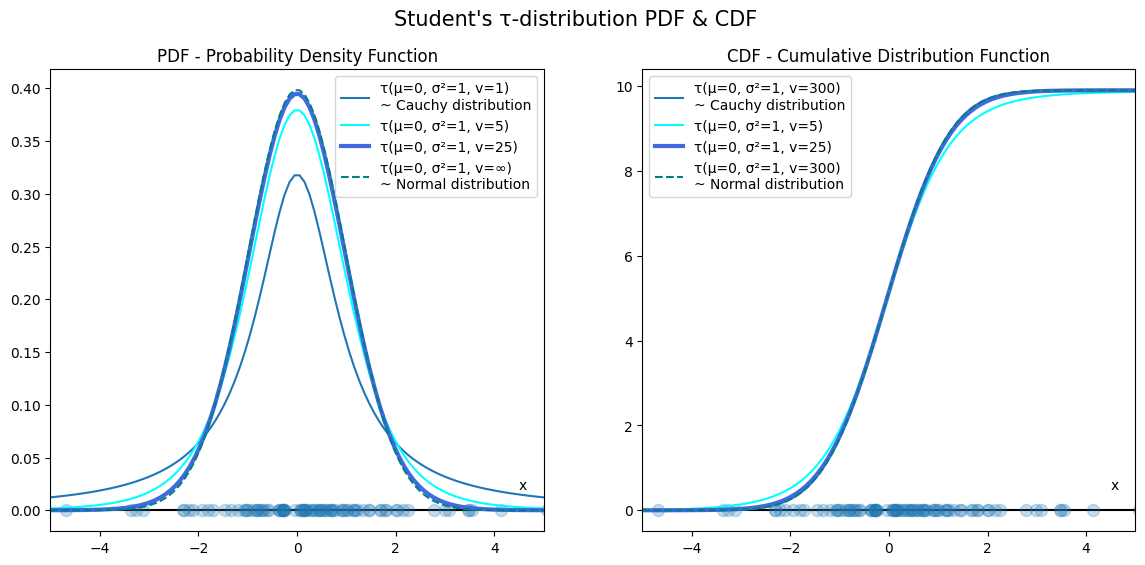

In [3]:
# Student's τ distribution
size = 100
stdist = StudentsτDistribution(0, 1, 1)
data = stdist.sample(size)
zeros = stdist.zeros(size)
x = np.linspace(-5,5,size)

# Plot
fig, ax = plt.subplots(1,2,figsize=(14,6))
fig.suptitle('Student\'s τ-distribution PDF & CDF', size=15)

ax[0].scatter(data[:], zeros, alpha=0.25, zorder=2, s=75)
ax[0].plot(x, zeros, c='black', zorder=1)
ax[0].annotate('x', (4.5,0.02))
ax[0].set_title('PDF - Probability Density Function')
ax[0].set_xlim(-5,5)
ax[0].plot(x, stdist.pdf(x), label='τ(μ={}, σ²={}, v={})\n~ Cauchy distribution'.format(stdist.μ, stdist.σ ** 2, stdist.v))
stdist.v = 5
ax[0].plot(x, stdist.pdf(x), c='cyan', label='τ(μ={}, σ²={}, v={})'.format(stdist.μ, stdist.σ ** 2, stdist.v))
stdist.v = 25
ax[0].plot(x, stdist.pdf(x), c='royalblue', linewidth=3, label='τ(μ={}, σ²={}, v={})'.format(stdist.μ, stdist.σ ** 2, stdist.v))
stdist.v = 300
ax[0].plot(x, stdist.pdf(x), c='teal', label='τ(μ={}, σ²={}, v=∞)\n~ Normal distribution'.format(stdist.μ, stdist.σ ** 2), linestyle='--')
ax[0].legend()

ax[1].scatter(data[:], zeros, alpha=0.25, zorder=2, s=75)
ax[1].plot(x, zeros, c='black', zorder=1)
ax[1].plot(x, stdist.cdf(x), label='τ(μ={}, σ²={}, v={})\n~ Cauchy distribution'.format(stdist.μ, stdist.σ ** 2, stdist.v))
stdist.v = 5
ax[1].plot(x, stdist.cdf(x), label='τ(μ={}, σ²={}, v={})'.format(stdist.μ, stdist.σ ** 2, stdist.v), c='cyan')
stdist.v = 25
ax[1].plot(x, stdist.cdf(x), label='τ(μ={}, σ²={}, v={})'.format(stdist.μ, stdist.σ ** 2, stdist.v), c='royalblue', linewidth=3)
stdist.v = 300
ax[1].plot(x, stdist.cdf(x), label='τ(μ={}, σ²={}, v={})\n~ Normal distribution'.format(stdist.μ, stdist.σ ** 2, stdist.v), c='teal', linestyle='--')
ax[1].annotate('x', (4.5,0.5))
ax[1].set_title('CDF - Cumulative Distribution Function')
ax[1].set_xlim(-5,5)
ax[1].legend()

## Gamma (and derived) distributions

### Exponential distribution

In [104]:
import numpy as np
import matplotlib.pyplot as plt

class ExponentialDistribution:
    
    # Params
    λ = []

    # Constructor
    def __init__(self, λ):
        if λ < 0:
            raise Exception("Invalid parameter: λ must be non-negative.")
        self.λ = λ

    # Sample from distibution
    def sample(self, size):
        return np.random.exponential(self.λ, size)
    
    # Exponential function
    def pdf_value(self, value):
        if value < 0:
            return 0
        else:
            return self.λ * np.exp(-self.λ * value)

    # PDF - Probability density function
    def pdf(self, axis):
        return np.concatenate([np.zeros(len(axis[axis<0])), self.λ * np.exp(-self.λ * axis[axis >= 0])])
    
    # CDF - Cumultative Density Function
    def cdf(self, axis):
        return np.cumsum(self.pdf(axis))

    # Array of zeros with size param
    def zeros(self, size):
        return np.zeros(size)

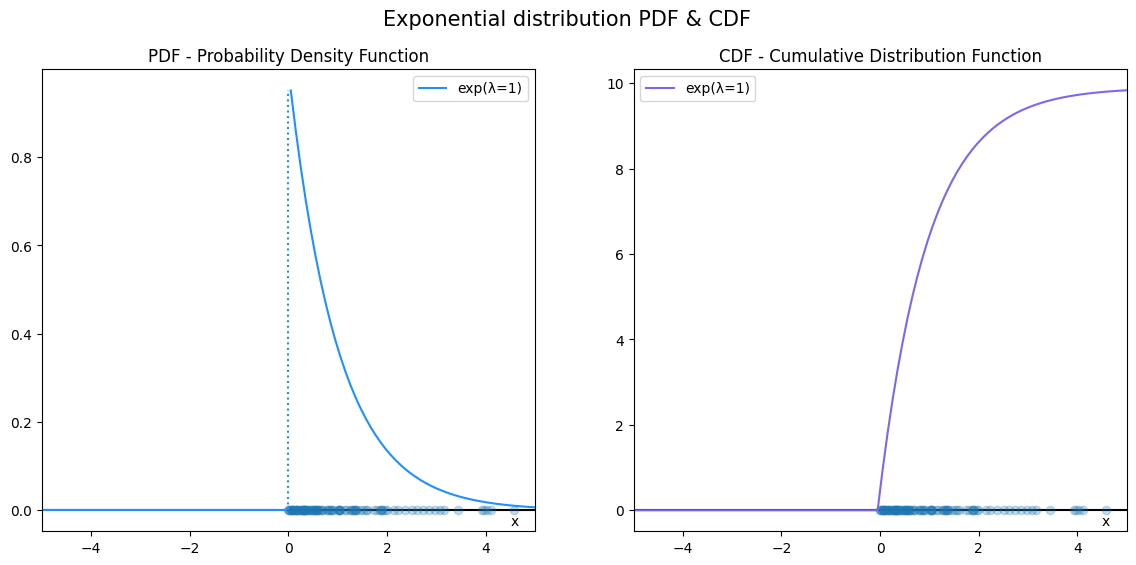

In [107]:
# Exponential distribution
size = 100
exp = ExponentialDistribution(1)
data = exp.sample(size)
zeros = exp.zeros(size)
x = np.linspace(-5,5,size)

# Plot
fig, ax = plt.subplots(1,2,figsize=(14,6))
fig.suptitle('Exponential distribution PDF & CDF', size=15)

ax[0].scatter(data[:], zeros, alpha=0.25, zorder=2)
ax[0].plot(x, zeros, c='black', zorder=1)
ax[0].plot(x[0:50], exp.pdf(x)[x < 0], c='dodgerblue')
ax[0].plot(x[50:100], exp.pdf(x)[x >= 0], label='exp(λ={})'.format(exp.λ), c='dodgerblue')
ax[0].plot(np.zeros(10), np.linspace(0,exp.pdf_value(0.05),10), c='dodgerblue', linestyle='dotted')
ax[0].annotate('x', (4.5, -0.035))
ax[0].set_title('PDF - Probability Density Function')
ax[0].set_xlim(-5,5)
ax[0].legend()

ax[1].scatter(data[:], zeros, alpha=0.25, zorder=2)
ax[1].plot(x, zeros, c='black', zorder=1)
ax[1].plot(x, exp.cdf(x), label='exp(λ={})'.format(exp.λ), c='mediumslateblue')
ax[1].annotate('x', (4.5,-0.35))
ax[1].set_title('CDF - Cumulative Distribution Function')
ax[1].set_xlim(-5,5)
ax[1].legend()